<a href="https://colab.research.google.com/github/jvbdf/tmbd_work3/blob/main/TMBD_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction to the problem of study [1,0 valor]

In a scenario increasingly marked by the abundance of data, multivariate analysis has become an essential tool for understanding complex structures and extracting relevant information. In particular, when working with high-dimensional datasets, challenges arise such as redundancy among variables, undesirable correlations, statistical noise, and visualization difficulties. These factors not only compromise computational efficiency but also hinder the interpretation of results and the construction of robust models. Dimensionality reduction emerges, in this context, as a fundamental strategy to simplify data without losing the essence of the information it carries. Among the available methods, Principal Component Analysis (PCA) stands out for its theoretical soundness, algorithmic simplicity, and practical versatility. By transforming original variables into orthogonal linear combinations that maximize explained variance, PCA allows data to be represented in a lower-dimensional space, facilitating visualization, compression, and preparation for subsequent analytical tasks. This technique has been widely used in areas such as bioinformatics, pattern recognition, climatology, telecommunications, and industry, demonstrating its ability to adapt to different contexts and requirements. Its application is particularly relevant when the goal is to explore latent relationships among variables, eliminate redundancies, or prepare data for machine learning algorithms. In this work, it is assumed that dimensionality reduction can be a critical step in exploratory data analysis, serving as a basis for subsequent tasks such as classification, clustering, or segmentation.

## 2. Brief and general description of the approach and methods used [1,5 valor]

Principal Component Analysis (PCA) is a statistical technique for dimensionality reduction that transforms a set of possibly correlated variables into a new set of uncorrelated variables, known as principal components. These components are constructed to capture the maximum possible variance from the original data, allowing the essential structure of the dataset to be represented with fewer dimensions. The process is based either on the decomposition of the covariance matrix or on the application of singular value decomposition (SVD), depending on the implementation. Before applying PCA, it is common to perform data preprocessing, such as normalization or centering, to ensure that all variables contribute equally to the analysis. The approach used in this work follows this logic: the data are prepared, PCA is applied to extract the principal components, and the results are analyzed based on the explained variance and the projection of the data into a lower-dimensional space. This methodology not only simplifies the data but also facilitates subsequent tasks such as visualization, clustering, or classification, depending on the application context.

## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]
Principal Component Analysis (PCA) originated in the early 20th century, when Karl Pearson introduced in 1901 a geometric formulation to find lines and planes that best fit systems of points in multidimensional spaces [1]. Later, in 1933, Harold Hotelling formalized the method in the statistical context, defining principal components as orthogonal linear combinations of the original variables that maximize the explained variance [2]. These foundational contributions established PCA as one of the central techniques of multivariate statistics.

Over the following decades, PCA was widely applied in areas such as psychometrics, biology, chemistry, and social sciences, consolidating itself as an essential tool for dealing with high-dimensional data [3]. The theoretical and practical development was systematized by Ian Jolliffe, whose book Principal Component Analysis (2002) is considered a key reference, offering a comprehensive view of fundamentals, algorithms, and applications [4].

From an algorithmic point of view, PCA can be implemented through the spectral decomposition of the covariance matrix or, more efficiently, through singular value decomposition (SVD), both techniques well documented in the statistical and computational literature [6].

Contemporary literature further highlights the versatility of PCA in tasks such as data compression, visualization, preprocessing for machine learning algorithms, and discovery of latent patterns, demonstrating its relevance in both academic and industrial contexts [7]. In practical applications, such as customer segmentation, sensor analysis, or industrial process optimization, PCA has proven highly useful in simplifying complex structures and revealing hidden relationships among variables [8].

## 4. About the main method/algorithm used [1,5 valor]



## 5. Python imports and global configurations [0,5 valor]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

## 6. Dataset and variables explanation [1,5 valor]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


## 7. Main code as possible solution to the problem [1,5 valor]

In [ ]:
#read dataset
df = pd.read_csv("data.csv", encoding='latin1')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset):
    for i in dataset.columns:
        null_feat = pd.DataFrame(len(dataset[i]) - dataset.isnull().sum(), columns = ['Count'])
        percentage_null = pd.DataFrame((len(dataset[i]) - (len(dataset[i]) - dataset.isnull().sum()))/len(dataset[i])*100, columns = ['Count'])
        percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#D84E5F',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values Analysis with BarPlot")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)


def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(60, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(" Types of Features ".center(60, '*'))
    print(df.dtypes,"\n")
    print(' Duplicate Values Analysis '.center(60, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print("".center(60, '*'))


check_df(df)
missing_plot(df)

************************** SHAPE ***************************
Observations -------> 569
Features     -------> 33
******************** Types of Features *********************
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst         

In [ ]:
# Since they do not carry any pattern, we exclude them from the data set.
#remover colunas irrelevantes, as colunas id e UNNAMED:32 não contribuem para a analise
df.drop(['id', 'Unnamed: 32'], axis= 1, inplace= True)

As técnicas PCA e t-SNE não usam a target, estas técnicas servem para reduzir features numéricas (o target não faz parte dos dados que queremos transformar, é a variável dependente, não é uma feature explicativa).

"diagnosis" é uma feature categórica e as técnicas que pretendemos aplicar só se aplicam às features numéricas

In [ ]:
#remover a coluna alvo/ target(classe) - o queremos prever/classificar
df_ = df.drop(['diagnosis'], axis= 1)

In [ ]:
#normalizar os dados
#PCA exige os dados normalizados para evitar que features com valores maiores dominem a análise
df_ = StandardScaler().fit_transform(df_)

## 8. Analysis of Example 1 [3,0 valor]
- Aplicando com um dataset só com variaveis númericas

## PCA

In [ ]:
pca = PCA()
pca_fit = pca.fit_transform(df_) #contem as componentes principais para cada observação

In [ ]:
# variancia explicada por cada componente
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

O 1º valor do array corresponde à PC1, o 2º valor corresponde à PC2, e assim sucessivamente. Por definição, PC1>PC2>PC3>... pois o PCA calcula PC1 = direçao de maior variância possivel, PC2 = direçao ortogonal de maior variância apõs remover PC1, PC3=direçao ortogonal seguinte...

No array verificasse que a variância é decrescente.

Isto serve para decidir quantas componentes principais vamos usar.

In [ ]:
#soma acumulada (cumulative sum) da variância explicada
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

:o 1º valor do array indica a variancia explicada se usar apenas PC1, o 2º valor do array indica a percentagem de variancia explicada se usar PC1 + PC2, etc.


 **Número ótimo de componentes principais**

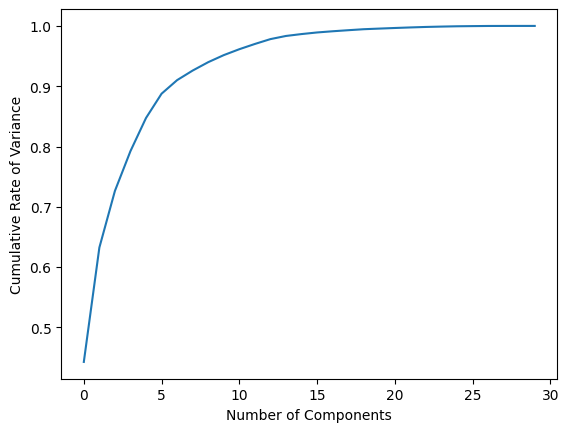

In [ ]:
# 1º método - nº ótimo de componentes principais usando o grafico da variancia acumulada
pca = PCA().fit(df_)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Rate of Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.show()

In [ ]:
#2º método - # to find principal component which is taken greather than 95 %
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100) # converte a variancia explicada acumulada para percentagem
Num_components = var1<95 #gera um vetor boleano onde cada True corresponde a uma componente principal que ainda não atingiu 95%
#A soma de True (=1) dá o número de componentes necessários ANTES de ultrapassar 95%.
print("Optimum Number of Components",Num_components.sum())

Optimum Number of Components 9


In [ ]:
df = df.copy()

y = df['diagnosis'] # Dependent variable
X = df.drop(['diagnosis'], axis=1)  # Independent Variable

def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)

In [ ]:
explained_var = pd.DataFrame({
    'PC': [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    'Variance Explained (%)': pca.explained_variance_ratio_ * 100
})

print(explained_var)


      PC  Variance Explained (%)
0    PC1               44.272026
1    PC2               18.971182
2    PC3                9.393163
3    PC4                6.602135
4    PC5                5.495768
5    PC6                4.024522
6    PC7                2.250734
7    PC8                1.588724
8    PC9                1.389649
9   PC10                1.168978
10  PC11                0.979719
11  PC12                0.870538
12  PC13                0.804525
13  PC14                0.523366
14  PC15                0.313783
15  PC16                0.266209
16  PC17                0.197997
17  PC18                0.175396
18  PC19                0.164925
19  PC20                0.103865
20  PC21                0.099910
21  PC22                0.091465
22  PC23                0.081136
23  PC24                0.060183
24  PC25                0.051604
25  PC26                0.027259
26  PC27                0.023002
27  PC28                0.005298
28  PC29                0.002496
29  PC30  

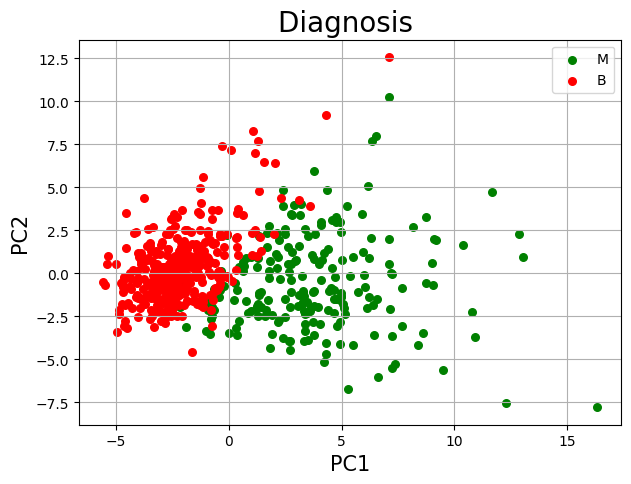

In [ ]:

def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(["black", "red","yellow","green"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=30)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

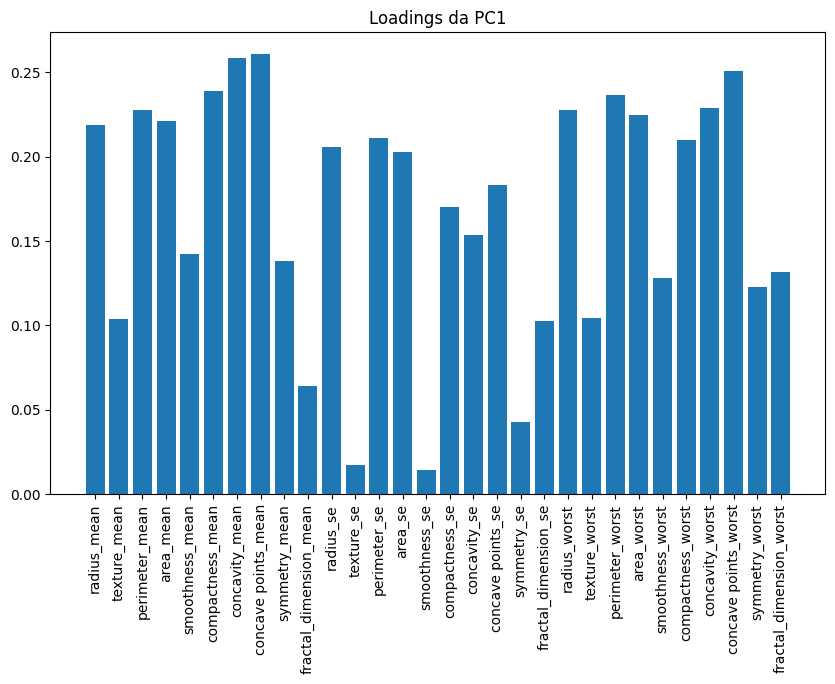

In [ ]:
#contributo de cada feauture para cada componente principal
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns
)

#print(loadings)


plt.figure(figsize=(10,6))
plt.bar(X.columns, loadings['PC1'])
plt.xticks(rotation=90)
plt.title("Loadings da PC1")
plt.show()


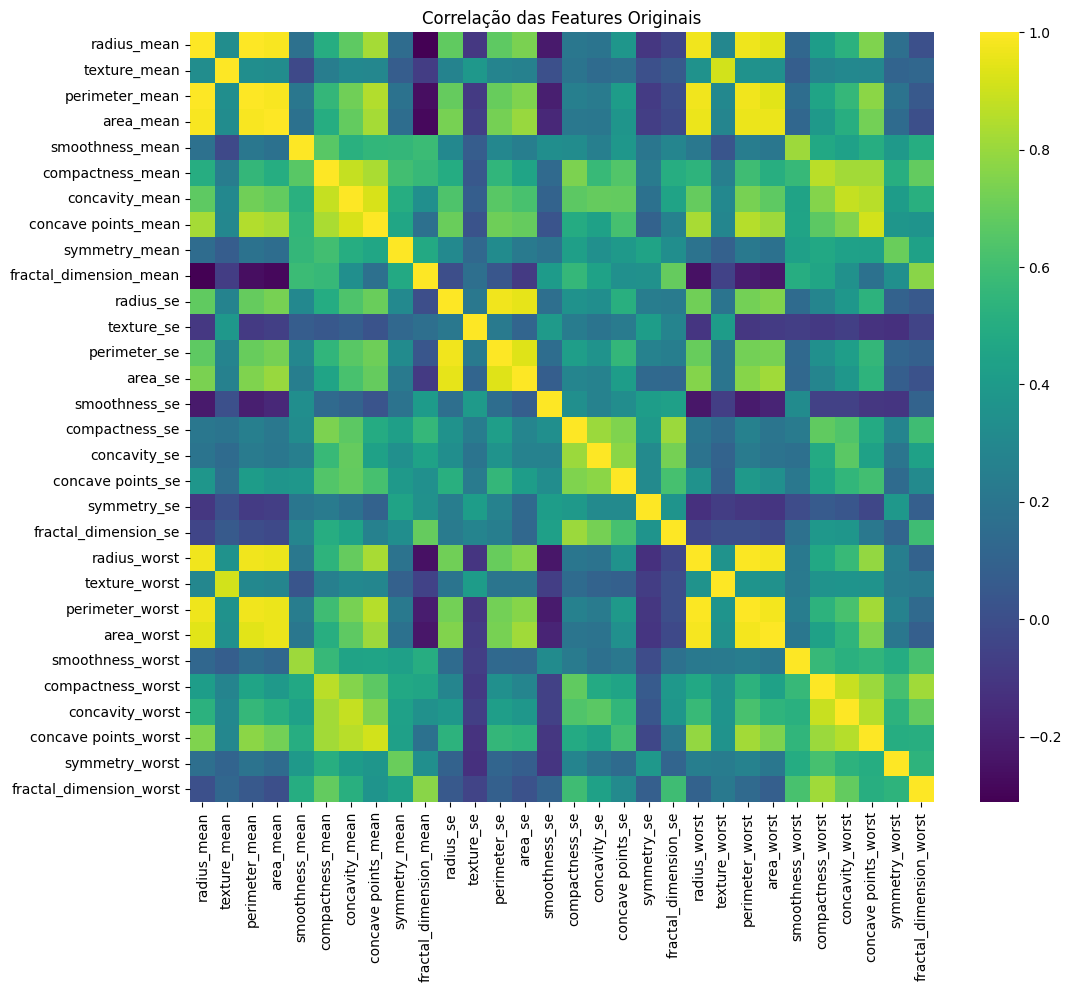

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='viridis')
plt.title("Correlação das Features Originais")
plt.show()


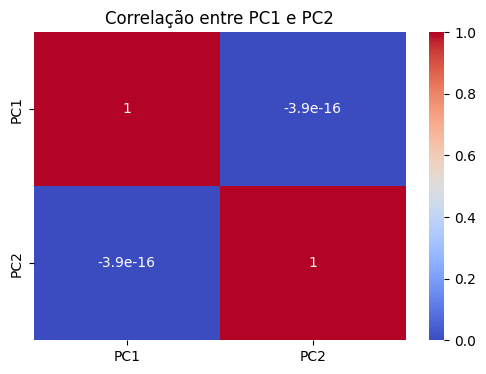

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(pca_df[['PC1','PC2']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre PC1 e PC2")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



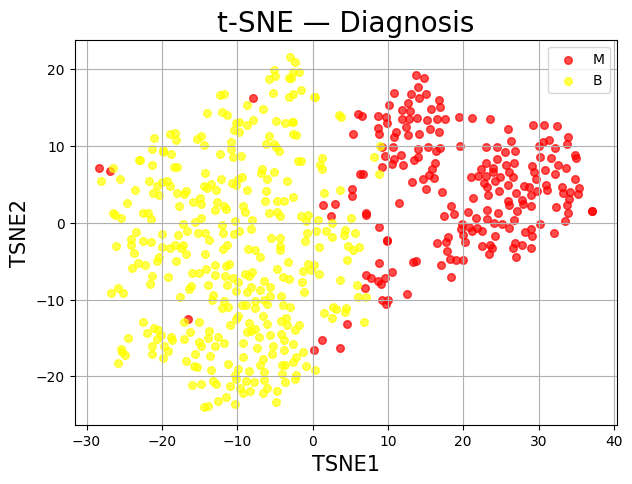

In [ ]:
# t-SNE

###########################################################################
#está repetido do que está na main
from sklearn.manifold import TSNE

# Carregar dataset
df = pd.read_csv("data.csv", encoding="latin1")

# Remover colunas irrelevantes
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Separar target
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

# Normalizar dados
X_scaled = StandardScaler().fit_transform(X)
###########################################################################

# ==========================
# FUNÇÃO PARA t-SNE
# ==========================
def create_tsne_df(X, y, perplexity=30, learning_rate=200, n_iter=1500, random_state=42):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        n_iter=n_iter,
        random_state=random_state,
        init='pca'
    )

    tsne_fit = tsne.fit_transform(X)
    tsne_df = pd.DataFrame(tsne_fit, columns=['TSNE1', 'TSNE2'])
    final_df = pd.concat([tsne_df, pd.DataFrame(y)], axis=1)

    return final_df

tsne_df = create_tsne_df(X_scaled, y)

# ==========================
# GRÁFICO t-SNE
# ==========================
def plot_tsne(dataframe, target):
    plt.figure(figsize=(7, 5))
    ax = plt.gca()
    ax.set_xlabel('TSNE1', fontsize=15)
    ax.set_ylabel('TSNE2', fontsize=15)
    ax.set_title(f't-SNE — {target.capitalize()}', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(["black", "red", "yellow", "green"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(
            dataframe.loc[indices, 'TSNE1'],
            dataframe.loc[indices, 'TSNE2'],
            c=color,
            s=30,
            alpha=0.7
        )

    ax.legend(targets)
    ax.grid()
    plt.show()

plot_tsne(tsne_df, "diagnosis")


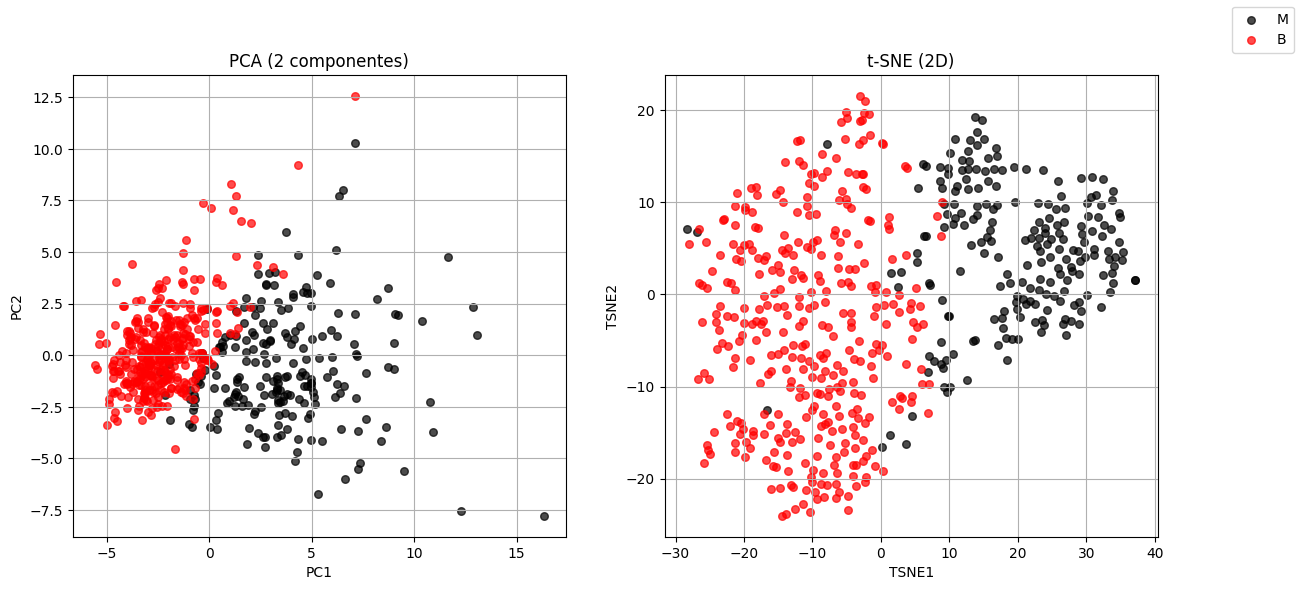

In [ ]:
#comparar as duas técnicas
def compare_pca_tsne(pca_df, tsne_df, target):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # PCA
    axes[0].set_title("PCA (2 componentes)")
    targets = list(pca_df[target].unique())
    colors = random.sample(["black", "red", "yellow", "green"], len(targets))

    for t, color in zip(targets, colors):
        idx = pca_df[target] == t
        axes[0].scatter(
            pca_df.loc[idx, 'PC1'],
            pca_df.loc[idx, 'PC2'],
            c=color,
            s=30,
            alpha=0.7
        )
    axes[0].set_xlabel("PC1")
    axes[0].set_ylabel("PC2")
    axes[0].grid()

    # t-SNE
    axes[1].set_title("t-SNE (2D)")
    for t, color in zip(targets, colors):
        idx = tsne_df[target] == t
        axes[1].scatter(
            tsne_df.loc[idx, 'TSNE1'],
            tsne_df.loc[idx, 'TSNE2'],
            c=color,
            s=30,
            alpha=0.7
        )
    axes[1].set_xlabel("TSNE1")
    axes[1].set_ylabel("TSNE2")
    axes[1].grid()

    fig.legend(targets, loc="upper right")
    plt.show()

compare_pca_tsne(pca_df, tsne_df, "diagnosis")


O t-SNE teve desempenho visual muito superior ao PCA no teu dataset de cancro da mama.

As diferenças entre tumores Benignos e Malignos não são puramente lineares

PCA, sendo linear, capta só parte da variabilidade

t-SNE consegue revelar clusters não lineares escondidos

## IGUAL AO QUE ESTÁ NO KAGGLe - tem as duas técnicas

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 38.912067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.025543
[t-SNE] KL divergence after 2000 iterations: 0.205476


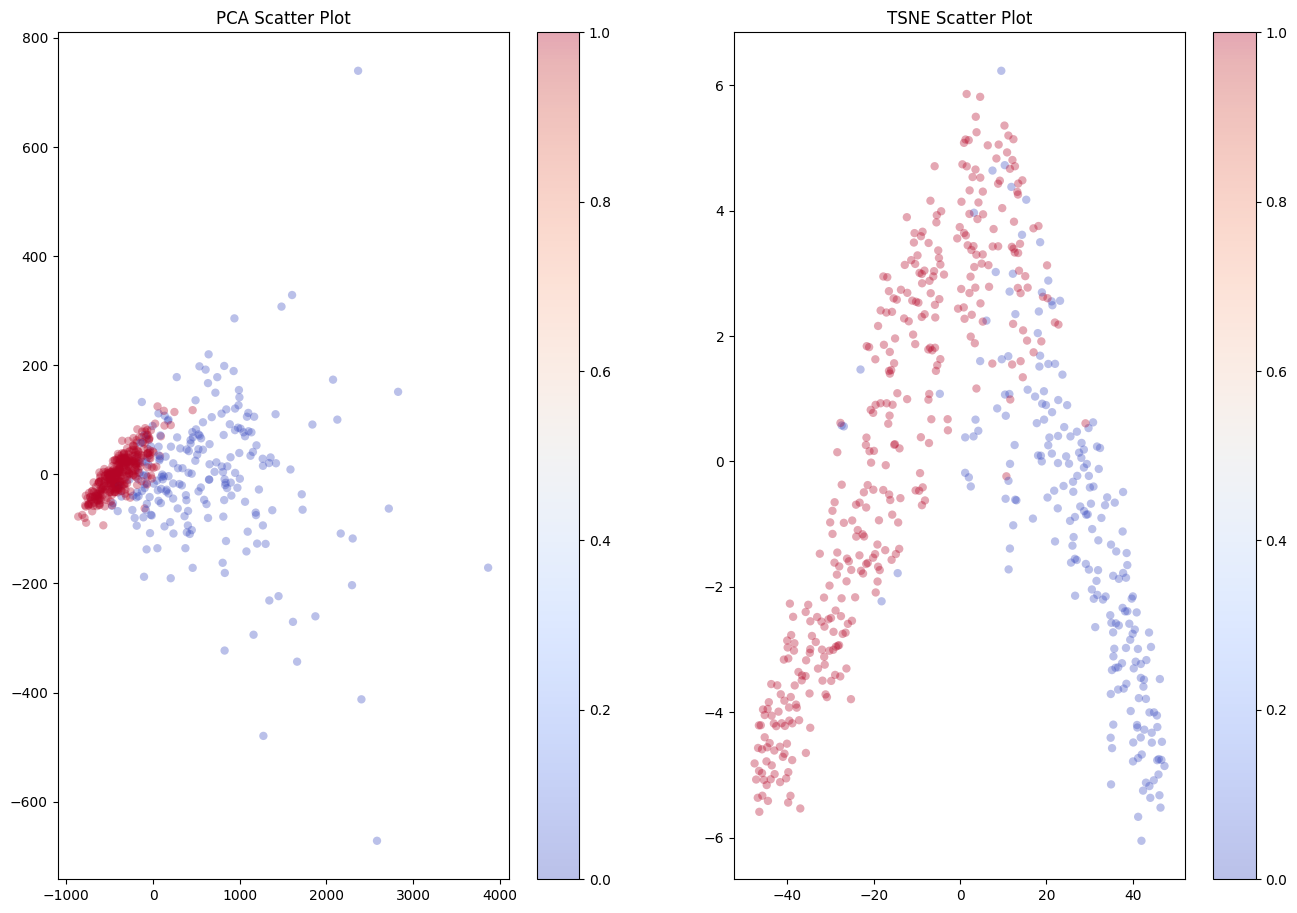

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.179085
[t-SNE] KL divergence after 2000 iterations: 0.861098


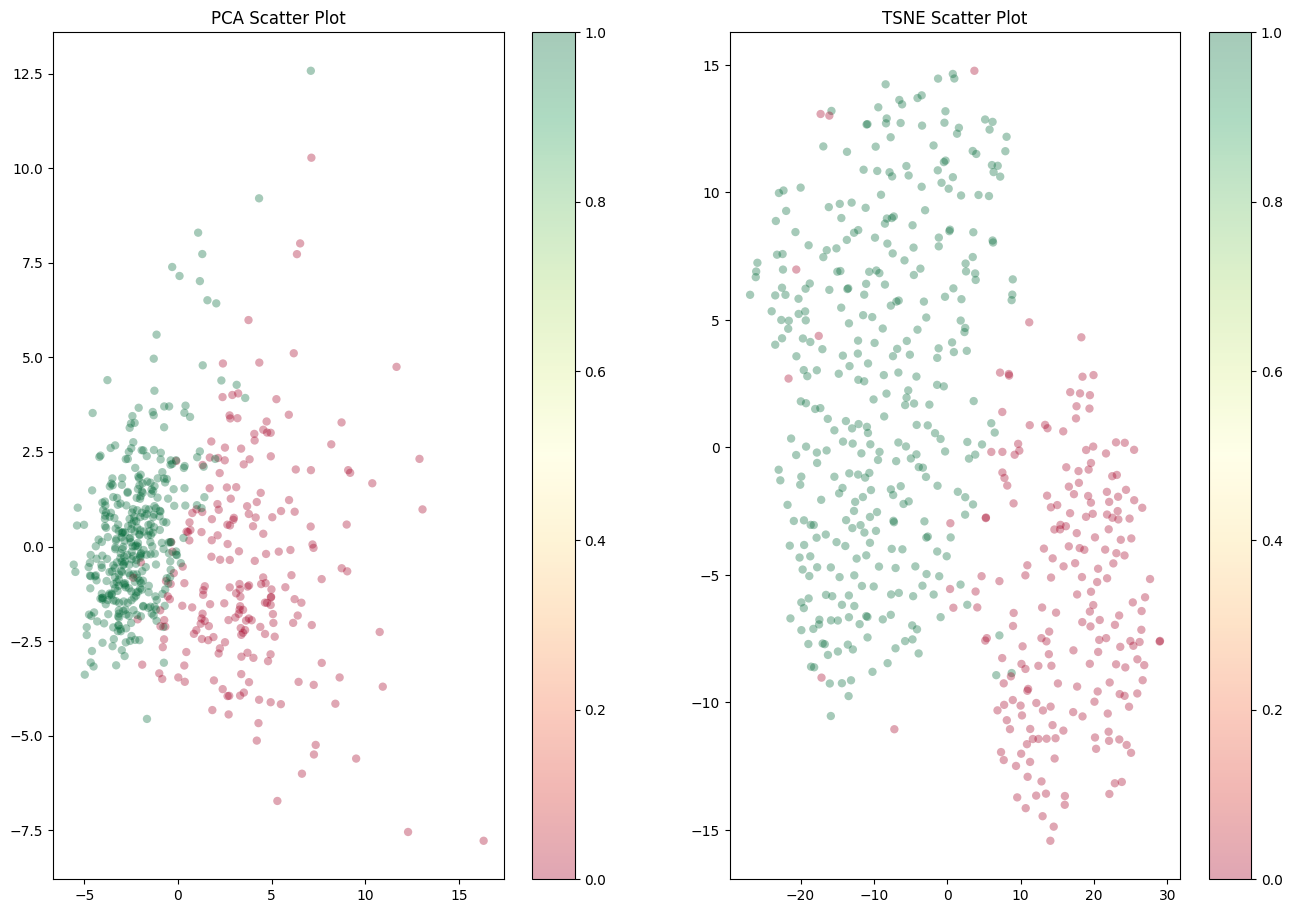

In [ ]:
#read dataset
data = pd.read_csv("data.csv", encoding='latin1')
data.head(5)
# Drop the id column
data = data.drop('id', axis=1)
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()


# Calling Sklearn scaling method
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Invoke the PCA method on the standardised data
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target,
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target,
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()


**os gráficos estao diferentes perceber porque/se é suposto mudar alguma coisa/ qual é melhor/mais correto**

##Questão
A aplicação de técnicas de redução de dimensionalidade como PCA e t-SNE facilita visualmente a distinção entre padrões nos dados?

##Resposta
Sim. Os gráficos gerados com PCA e t-SNE tornam a distinção entre padrões visivelmente mais clara. O gráfico de PCA revela uma separação linear entre os dados, sugerindo que os componentes principais capturam variações globais relevantes. Já o gráfico de t-SNE evidencia agrupamentos mais definidos e compactos, permitindo identificar visualmente possíveis clusters ou classes. Essa representação bidimensional facilita a interpretação humana e pode apoiar decisões iniciais sobre estrutura dos dados, viabilidade de classificação e presença de subgrupos relevantes.

## 9. Analysis of Example 2 [3,0 valor]




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random
import seaborn as sns

# Configurações globais
pd.set_option('display.max_columns', None)
np.random.seed(42)

# Variáveis já definidas no ambiente (carregadas e escaladas)
# N_COMPONENTS = 6 (Critério de Kaiser)



# 1. PRÉ-PROCESSAMENTO E PCA

print("1. Pré-processamento dos dados...")
df = pd.read_csv("data.csv", encoding="latin1")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

N_COMPONENTS = 6
print(f"2. Aplicando PCA com {N_COMPONENTS} Componentes (Critério de Kaiser)...")
pca_final = PCA(n_components=N_COMPONENTS)
X_pca = pca_final.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, random_state=42, stratify=y
)



# 3. RANDOM FOREST:

print("\n3. A executar Grid Search com Regularização Aumentada...")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro', # Otimizar pelo equilíbrio
    cv=skf,
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n" + "="*50)
print(f"## 🏆 Resultados da Otimização (RF Regularizado, PCA - {N_COMPONENTS}) ##")
print(f"Melhores Hiperparâmetros encontrados: {best_params}")
print(f"Melhor Score (CV - F1 Macro): {grid_search.best_score_:.4f}")
print("====================================================================")


# 4. AVALIAÇÃO FINAL

y_pred_opt = best_model.predict(X_test)

# Calcular métricas na base de teste
accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt, pos_label='M')
recall_opt = recall_score(y_test, y_pred_opt, pos_label='M')
f1_opt = f1_score(y_test, y_pred_opt, pos_label='M')
conf_matrix_opt = confusion_matrix(y_test, y_pred_opt)

conf_df_opt = pd.DataFrame(conf_matrix_opt,
                           index=['Real Benigno', 'Real Maligno'],
                           columns=['Predito Benigno', 'Predito Maligno'])

print("\n## Avaliação Final na Base de Teste (Regularizado) ##")
print(f"Accuracy (Otimizada): {accuracy_opt:.4f}")
print(f"Precision (Otimizada): {precision_opt:.4f}")
print(f"Recall (Sensibilidade): {recall_opt:.4f}")
print(f"F1-Score (Otimizada): {f1_opt:.4f}")
print("\n--- Matriz de Confusão Otimizada ---")
print(conf_df_opt)



1. Pré-processamento dos dados...
2. Aplicando PCA com 6 Componentes (Critério de Kaiser)...

3. A executar Grid Search com Regularização Aumentada...

## 🏆 Resultados da Otimização (RF Regularizado, PCA - 6) ##
Melhores Hiperparâmetros encontrados: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}
Melhor Score (CV - F1 Macro): 0.9623

## Avaliação Final na Base de Teste (Regularizado) ##
Accuracy (Otimizada): 0.9386
Precision (Otimizada): 0.9268
Recall (Sensibilidade): 0.9048
F1-Score (Otimizada): 0.9157

--- Matriz de Confusão Otimizada ---
              Predito Benigno  Predito Maligno
Real Benigno               69                3
Real Maligno                4               38


##Question
Is it possible to reliably predict whether a person has a benign or malignant tumor based on the available variables?

##Answer
Yes. The results obtained with the regularized Random Forest model, after applying PCA with 6 components, demonstrate a high predictive capacity. The model achieved an F1-Score of 0.9157 on the test set, with an accuracy of 0.9386, indicating that it can robustly distinguish between benign and malignant cases. The confusion matrix shows only a small number of errors (3 benign cases classified as malignant and 4 malignant cases classified as benign), highlighting that the model generalizes well and can be considered reliable for predicting the nature of the tumor based on the analyzed variables.

## 10. Pros and cons of the approach [2,0 valor]

PROS:

Combating Overfitting and Noise Reduction: Dimensionality reduction (PCA or t-SNE) acts as a powerful pre-processing step, removing redundancy and statistical noise.

Efficiency and Scalability: Reducing 30 features to 6 accelerates the training of the Random Forest, making the model more efficient in terms of calculation time and memory, which is especially useful for large datasets.

Visualization: It allows plotting the separation of classes (Malignant vs. Benign) in 2D, which is essential for Exploratory Data Analysis (EDA).

Classifier Robustness: The Random Forest is intrinsically robust, handles non-linearity well, and allows the use of class_weight='balanced' to deal with class imbalance (protecting clinical Recall).

CONS:

Information Loss (PCA): PCA discards the variance not captured in the selected components (you retained 6 PCs, but lost 11.24% of the information). If the remaining information is critical for differentiating difficult diagnostic cases, the model may make errors.


## 11. Future improvements [2,0 valor]

Compare the performance of PCA-RF with a Random Forest trained directly on the 30 original variables, checking whether there is any relevant difference. If the results are similar, the model with the 30 features may be preferred due to its greater interpretability.

Explore other algorithms such as SGBoost, SVM, and Neural Networks to assess whether they provide additional performance gains or capture patterns that Random Forest cannot, serving as benchmark alternatives and possible extensions of the work.


# 12 References [1,0 valor]

[1] Pearson, K. (1901). On lines and planes of closest fit to systems of points in space. Philosophical Magazine, 2(11), 559–572. https://doi.org/10.1080/14786440109462720

[2] Hotelling, H. (1933). Analysis of a complex of statistical variables into principal components. Journal of Educational Psychology, 24(6), 417–441. https://doi.org/10.1037/h0071325

[3] Jackson, J. E. (1991). A user’s guide to principal components. Wiley.

[4] Jolliffe, I. T. (2002). Principal component analysis (2nd ed.). Springer. https://doi.org/10.1007/b98835

[5] Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202. https://doi.org/10.1098/rsta.2015.0202

[6] Abdi, H., & Williams, L. J. (2010). Principal component analysis. Wiley Interdisciplinary Reviews: Computational Statistics, 2(4), 433–459. https://doi.org/10.1002/wics.101

[7] Wold, S., Esbensen, K., & Geladi, P. (1987). Principal component analysis. Chemometrics and Intelligent Laboratory Systems, 2(1–3), 37–52. https://doi.org/10.1016/0169-7439(87)80084-9

[8] Bro, R., & Smilde, A. K. (2014). Principal component analysis. Analytical Methods, 6(9), 2812–2831. https://doi.org/10.1039/C3AY41907J

